In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt

df = pd.read_csv('nft_sales.csv')

print(df)

               Collections           Sales     Buyers        Txns     Owners
0            Axie Infinity  $4,090,222,023  1,790,587  17,670,824  2,130,467
1     Bored Ape Yacht Club  $2,439,754,017     12,052      32,670      6,586
2              CryptoPunks  $2,388,467,992      6,076      22,269      3,804
3    Mutant Ape Yacht Club  $1,744,822,678     23,768      51,775     13,121
4               Art Blocks  $1,310,734,558     33,549     184,470     36,091
..                     ...             ...        ...         ...        ...
245             Mindblowon     $21,255,015     11,313      16,333      3,973
246        Sipherian Surge     $21,053,426      6,210      15,023      3,636
247            Gutter Rats     $20,915,001      2,931       5,209        NaN
248             Wool Pouch     $20,911,179      2,249       6,139      3,270
249            Los Muertos     $20,901,871     11,143      25,406      4,328

[250 rows x 5 columns]


In [4]:
df.describe()

,Collections,Sales,Buyers,Txns,Owners
count,250,250,250,250,231
unique,250,250,250,249,227
top,Axie Infinity,"$4,090,222,023","1,790,587","10,653","4,373"
freq,1,1,1,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Collections  250 non-null    object
 1   Sales        250 non-null    object
 2   Buyers       250 non-null    object
 3   Txns         250 non-null    object
 4   Owners       231 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [8]:
# Cleaning the dataset replacing commas with empty strings

df.rename(columns = {'Sales':'Sales in USD', 'Txns': 'Transactions'}, inplace = True)
df['Sales in USD'] = df['Sales in USD'].str.replace(',', '')
df['Sales in USD'] = df['Sales in USD'].str.replace('$', '')
df['Buyers'] = df['Buyers'].str.replace(',', '')
df['Transactions'] = df['Transactions'].str.replace(',','')
df['Owners'] = df['Owners'].str.replace(',','')
df = df.dropna()
df

,Collections,Sales in USD,Buyers,Transactions,Owners
0,Axie Infinity,4090222023,1790587,17670824,2130467
1,Bored Ape Yacht Club,2439754017,12052,32670,6586
2,CryptoPunks,2388467992,6076,22269,3804
3,Mutant Ape Yacht Club,1744822678,23768,51775,13121
4,Art Blocks,1310734558,33549,184470,36091
...,...,...,...,...,...
244,Potatoz,21467745,6253,13581,5108
245,Mindblowon,21255015,11313,16333,3973
246,Sipherian Surge,21053426,6210,15023,3636
248,Wool Pouch,20911179,2249,6139,3270


In [9]:
# Convert string numericals to INT

df['Sales in USD'] = df['Sales in USD'].astype('int64')
df['Buyers'] = df['Buyers'].astype('int64')
df['Transactions'] = df['Transactions'].astype('int64')
df['Owners'] = df['Owners'].astype('int64')

In [10]:
# Modifying the Dataset

df['100 mil club'] = np.where(df['Sales in USD']>=100000000, 'Yes', 'No')

In [15]:
# Sales of the NFTs which are under the Bored Ape Collection

bored_collection = df[df['Collections'].str.contains('Bored')]

sum_sales = bored_collection['Sales in USD'].sum()

print(f'Total Sales of Bored Ape Collection is {sum_sales:,}$')

print(bored_collection)

Total Sales of Bored Ape Collection is 2,825,485,316$
               Collections  Sales in USD  Buyers  Transactions  Owners  \
1     Bored Ape Yacht Club    2439754017   12052         32670    6586   
15   Bored Ape Kennel Club     350304508   10576         24508    5593   
165            Bored Bunny      35426791    8187         12678    3679   

    100 mil club  
1            Yes  
15           Yes  
165           No  


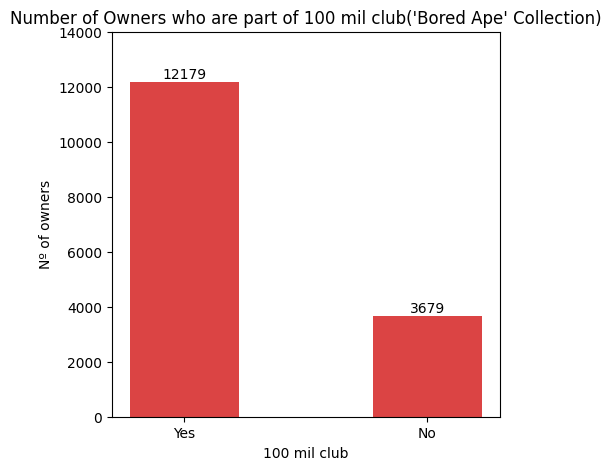

In [17]:
# Number of Owners who own Bored Ape Collection

df2 = bored_collection.groupby('100 mil club').sum()
owners = [df2['Owners'][1], df2['Owners'][0]]
con = ['Yes', 'No']
plt.style.use('default')
plt.figure(figsize=(5,5))
p = plt.bar(con, owners, width= 0.45, color='#db4444')
plt.ylim(0,14000)
plt.title("Number of Owners who are part of 100 mil club('Bored Ape' Collection)")
plt.bar_label(p)
plt.xlabel('100 mil club')
plt.ylabel('Nº of owners')
plt.show()

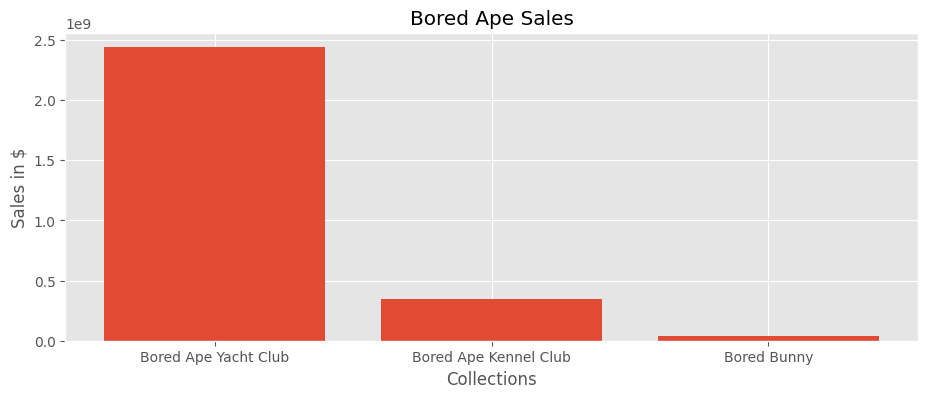

In [18]:
# Comparing sales with each other

collection = bored_collection['Collections']
sales = bored_collection['Sales in USD']
plt.style.use('ggplot')
plt.figure(figsize=(11,4))
plt.bar(collection, sales)
plt.title('Bored Ape Sales')
plt.xlabel('Collections')
plt.ylabel('Sales in $')
plt.show()

In [23]:
df_100 = df.loc[df['100 mil club'] == 'Yes']
average_sales_100 = round(df_100['Sales in USD'].mean())
df_no100 = df.loc[df['100 mil club'] == 'No']
average_sales_no100 = round(df_no100['Sales in USD'].mean())
print(f'Average sales of 100 mil club is ${average_sales_100:,}')

Average sales of 100 mil club is $514,041,026


<ipython-input-24-ce2717c923f2>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


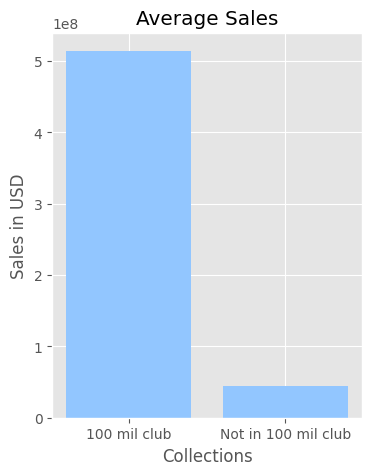

In [24]:
x = ['100 mil club', 'Not in 100 mil club']
avg = [average_sales_100, average_sales_no100]

plt.style.use('seaborn-pastel')
plt.figure(figsize=(4,5))

plt.bar(x, avg)
plt.title('Average Sales')
plt.xlabel('Collections')
plt.ylabel('Sales in USD')
plt.show()

<ipython-input-25-f59b6352ff31>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


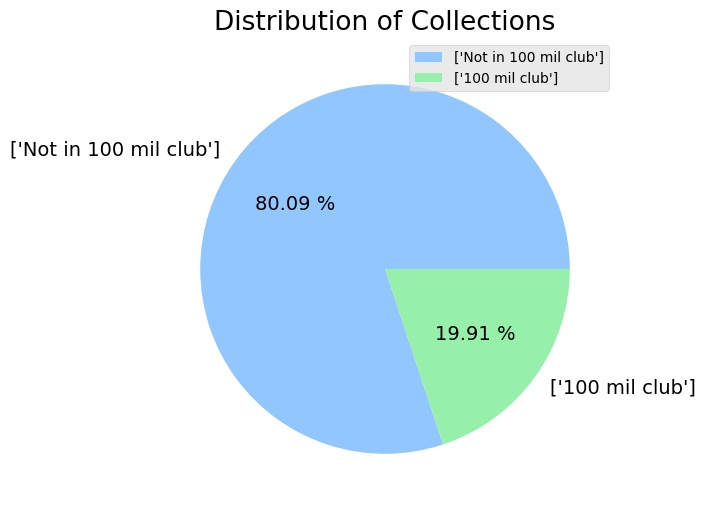

In [25]:
# Visualizing of how much percentage of total collections belongs to 100 mil club

count = df.groupby(['100 mil club']).count()['Collections']
labels = ['Not in 100 mil club'], ['100 mil club']
plt.style.use('seaborn-pastel')
plt.figure(figsize=(6,6))
plt.pie(count, labels=labels, autopct='%.2f %%', textprops={'fontsize': 14})
plt.title("Distribution of Collections", fontdict={'fontsize': 19})
plt.legend(fontsize=10)
plt.show()

In [28]:
# The all time collection mos sales

maximum_sale = df['Sales in USD'].max()
collection = df[df['Sales in USD'] == maximum_sale]['Collections'][0]

print(f'The NFT Collection having most sales is {collection}')
print(f'Total sales of {collection} are {maximum_sale:,} USD')

The NFT Collection having most sales is Axie Infinity
Total sales of Axie Infinity are 4,090,222,023 USD


NBA Top Shot has 21817564 transactions (Highest amongst all)
Bored Ape Yacht Club has 32670 transactions (Lowest amongst all


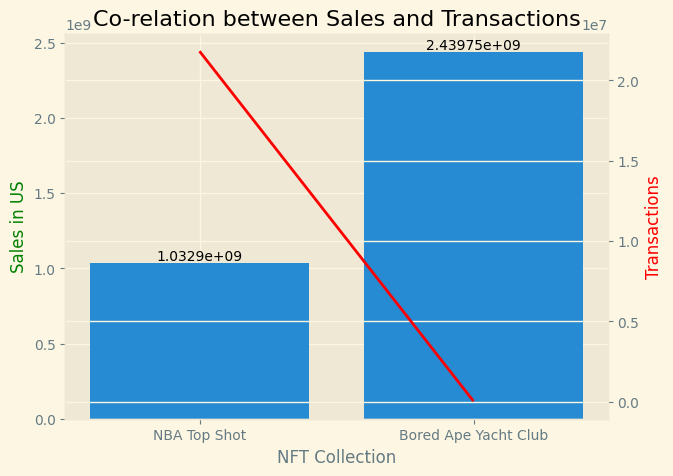

In [33]:
# Does more number of transaction prove more sales?

most_transaction = df['Transactions'].max()
most_data = df[df['Transactions'] == most_transaction]
collection_of_most = most_data['Collections'].iloc[0]
sales_of_most = most_data['Sales in USD'].iloc[0]

lower_transact = df.iloc[1][3]
collection_of_lower = df.iloc[1][0]
sales_of_lower = df.iloc[1][1]

print(f'{collection_of_most} has {most_transaction} transactions (Highest amongst all)')
print(f'{collection_of_lower} has {lower_transact} transactions (Lowest amongst all')

# Now using Graphs

collections = [collection_of_most, collection_of_lower]
sales = [sales_of_most, sales_of_lower]
transactions = [most_transaction, lower_transact]

plt.style.use('Solarize_Light2')
fig,ax1 = plt.subplots(figsize=(7,5))
ax2 = ax1.twinx()
p = ax1.bar(collections, sales)
ax2.plot(collections, transactions, 'r-')
ax1.bar_label(p)
plt.title('Co-relation between Sales and Transactions')
ax1.set_xlabel('NFT Collection')
ax1.set_ylabel('Sales in US', color='g')
ax2.set_ylabel('Transactions', color='r')
plt.show()